# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [7]:
m = medical['charges'].mean()
s = medical['charges'].std() 
print(m, s, s/m)

13270.422265141257 12110.011236693994 0.912556585972744


The standard deviation being so large relative to the mean (a ratio known as the 'coefficicent of variation') is a good sign that these data are probably skewed pretty hard to the right.  The median and IQR may be much better general measures here.  But let's make a histogram, this will make any substantial skew quite visible.

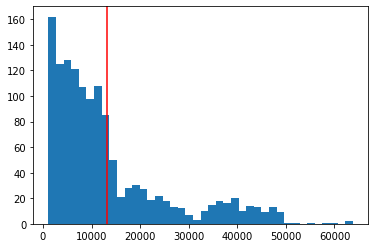

In [10]:
_ = plt.hist(medical['charges'], bins=40)
_ = plt.axvline(m, color='red')

Indeed, these data are heavily skewed to the right.  For billing data this is not surprising.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Considering that we are only interested in whether the population mean is LESS than a specific value, it's appropriate to use a one-sided hypothesis test, and the corresponding one-sided confidence bound.

In [13]:
# the 'sample' size is over 10,000, there's really no point in using the t distribution as opposed to normal...
criticalt = -t.ppf(0.05, df=1338)
criticalz = -norm.ppf(0.05)
print(criticalt, criticalz, criticalt-criticalz)

1.6459932615808077 1.6448536269514729 0.0011396346293348625


Wow!  I'm shocked that there's as much as a 0.0011 difference.  I guess I'll go ahead and use t.  For a one-sided confidence bound on the mean, we have:

In [17]:
margint = criticalt * s / np.sqrt(1338)
confbound = m - margint
print(confbound)

12725.487466208931


Since this lower confidence bound is still substantially greater than the test value, this supports pretty strongly the notion that the true population mean is greater than 12,000.  (Of course, this conclusion makes the assumption that the data represent a simple random sample.) 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  To test whether people with insurance are really charged a different amount from those without, the hypotheses are:  
H0: mu0 = mu1, vs. H1: mu0 != mu1.  That is, this is a two-tailed hypothesis test.  This test assumes that we have two independent random samples from populations with equal variances. 
        
The test also assumes that the samples are drawn from normally distributed populations... which the histogram above absolutely fails to support.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ First, let's partition the data into those with an insurance claim and those without.

In [32]:
insured = medical.loc[medical['insuranceclaim'] == 1]
uninsured = medical.loc[medical['insuranceclaim'] == 0]
n0 = len(uninsured['charges'])
n1 = len(insured['charges'])
m0 = uninsured['charges'].mean()
m1 = insured['charges'].mean()
v0 = uninsured['charges'].var()
v1 = insured['charges'].var()
print("Insured:", n1)
print("mean:", m1)
print("var:", v1)
print("Uninsured:", n0)
print("mean:", m0)
print("var:", v0)


Insured: 783
mean: 16423.928276537663
var: 197288105.14611322
Uninsured: 555
mean: 8821.421892306294
var: 41557492.81508627


At a glance, it seems that there's a very significant difference between these two groups.  I expect a very small p-value.  However, it's also worth noting that the sample data (well, what we're treating as sample data) don't appear to come from populations with equal variances.   

In [34]:
# using formulas above:

spooled = np.sqrt(((n0 - 1)*v0 + (n1 - 1)*v1)/(n0 + n1 - 2))
ttest = (m0 - m1)/(spooled*np.sqrt(1/n0 + 1/n1))
pvalue = 2*t.cdf(ttest, df = n0 + n1 -2)
print("pooled standard dev:", spooled, "test stat:", ttest, "p-value:", pvalue)


pooled standard dev: 11520.034268775256 test stat: -11.89329903087671 p-value: 4.461230231620972e-31


In [37]:
# using scipy.stats
from scipy.stats import ttest_ind
scipytest = ttest_ind(uninsured['charges'], insured['charges'])
print(scipytest.statistic)
print(scipytest.pvalue)

-11.893299030876712
4.461230231620717e-31


These results exactly match those found above, but were of course far easier to derive.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  There's no documentation in scipy.stats for equivalent tests using a standard normal distribution.  This is because, in reality, where both means and standard deviations are estimated from our samples, the actual sampling distribution of the test statistic follows a t distribution. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test